<a href="https://colab.research.google.com/github/ThePituLegend/RISCV-MISE/blob/main/%5Cexercicis%5CCombinacionals_2_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercici 4

Les accions d’una empresa estan repartides entre 4 persones en les següents proporcions:
* **A** - 15%
* **B** - 20%
* **C** - 25%
* **D** - 40%.

Les decisions es prenen per majoria simple, tenint el vot de cadascun dels accionistes un pes proporcional a la seva participació en les accions.
Cada accionista prem un polsador en cas de vot afirmatiu.

Dissenyeu un circuit amb MUX que activi la sortida quan la decisió és afirmativa.  

In [ ]:
# @title Carregar Py4Hw { display-mode: "form" }
# @markdown Des de GitHub

!pip install nbwavedrom                             &> /dev/null
!git clone https://github.com/ThePituLegend/py4hw   &> /dev/null
%cd /content/py4hw
from py4hw import *

if "py4hw" in dir():
  print("OK")
else:
  print("ERROR")

/content/py4hw
OK


## Disseny del circuit

Completa la següent classe amb la teva proposta de circuit.


In [ ]:
class Circuit(Logic):
  def __init__(self, parent: Logic, name: str, a: Wire, b: Wire, c: Wire, d: Wire,
               f: Wire):
    super().__init__(parent, name)
    self.addIn("a", a)
    self.addIn("b", b)
    self.addIn("c", c)
    self.addIn("d", d)

    self.addOut("f", f)

    zero = self.wire("Zero")
    one = self.wire("One")
    sel = self.wire("sel", 3)

    Constant(self, "0", 0, zero)
    Constant(self, "1", 1, one)

    #El módul Concatenate ens permet unir múltiples cables en un de sol.
    # TODO: Afegeix a la llista els cables que composen la selecció del multiplexor
    Concatenate(self, "sel", [a, b, c], sel)      # Alumne (La llista)

    # TODO: Instancia els cables intermitjos que necessitis
                                                  # Cap
    
    # TODO: Instancia els blocs funcionals que necesitis
    Mux(self, "mux", sel, [zero]+[d]*6+[one], f)  # Alumne (Correcte)
    #Mux(self, "mux", sel, [one]+[d]*4+[one]*3, f)  # Alumne (Incorrecte)

iter 4 cost: 0 False


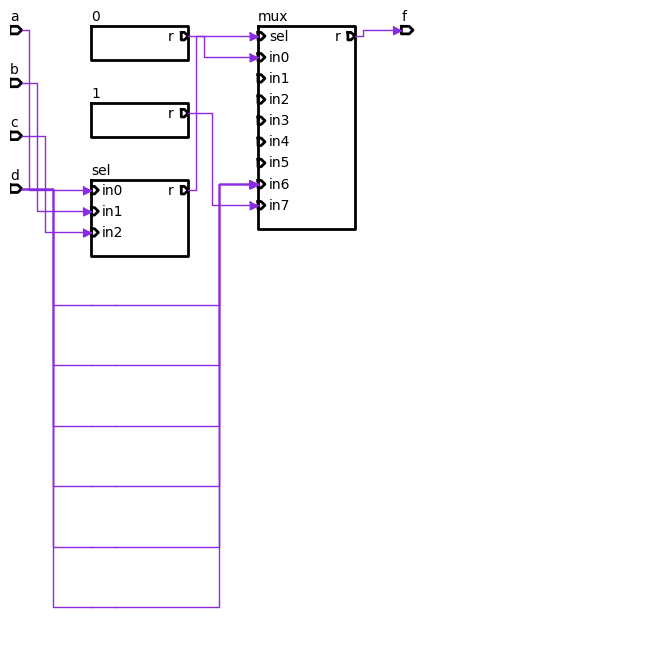

In [ ]:
# @title Esquemàtic del circuit implementat { display-mode: "form" }

schm = HWSystem()

a = schm.wire("a", 1)
b = schm.wire("b", 1)
c = schm.wire("c", 1)
d = schm.wire("d", 1)

f = schm.wire("f", 1)

circuit = Circuit(schm, "Circuit", a, b, c, d, f)

Schematic(circuit)

In [ ]:
# @title És correcte el meu circuit? { display-mode: "form" }
# @markdown El teu circuit passarà una prova automatitzada per a comprovar la seva validesa.

from IPython.display import Markdown, display
pprint = lambda x: display(Markdown(x))

test = HWSystem()

a = test.wire("a", 1)
b = test.wire("b", 1)
c = test.wire("c", 1)
d = test.wire("d", 1)

f = test.wire("f", 1)

circuit = Circuit(test, "Circuit", a, b, c, d, f)

sol = [0, 0, 
       0, 1,
       0, 1,
       0, 1,
       0, 1,
       0, 1,
       0, 1,
       1, 1]

sol_w = test.wire("Solución", 1)
Sequence(test, "Solución", sol, sol_w)

Sequence(test, "a", [0]*8 + [1]*8, a)
Sequence(test, "b", [0]*4 + [1]*4 + [0]*4 + [1]*4, b)
Sequence(test, "c", [0, 0, 1, 1]*4, c)
Sequence(test, "d", [i%2 for i in range(16)], d)

wf = Waveform(test, "TEST", [a, b, c, d, f, sol_w])

sim = test.getSimulator()

err = 0

for i, val in enumerate(sol):
  sim.clk(1)
  
  if f.get() != val:
    err += 1
    pprint(f"- **CLK {i+1}**: ¡Se esperaba **{val}** y se ha obtenido **{f.get()}**!")
    wf.waves[f]["wave"] =  wf.waves[f]["wave"][:-1] + "4"
  
if err == 0:
  pprint("**¡Circuito correcto!**")
else:
  pprint(f"**{err}** errores encontrados.")

draw_waveform(wf.get_waveform())    

**¡Circuito correcto!**